# Calibration of non-linear relations

## Non linear relations of $y = f(x)$


When we expect $$y = ax^2 + bx + c$$, our task is to estimate $a, b, c$ using the best-fit, i.e that coefficients that give us the smallest error between the the model and the measurements. 

In any case, the easiest and most accurate fit is of a **linear** type - we know that the **static sensitivity** is our goal and it has a lot of usefuleness in the following measurements. Therefore we always look for the way to convert our non-linear relation to linear one and then perform best-fit or *regression* on the transformed variables. 

$$ y = ax^2 + bx \to y/x = ax + b $$

$$ y = bx^a \to \log(y) = a \log(x) + \log(b) $$

$$ y = b\exp{ax} = be^{ax} \to \ln(y) = a\ln(x) + \ln(b) $$

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = 10, 8 
pylab.rcParams['font.size'] = 16 

# read the data
import numpy as np
x = np.array([0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]) # cm
y = np.array([0.4, 1.0, 2.3, 6.9, 15.8, 36.4, 110.1, 253.2]) # Volt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, '$y$ [V]')

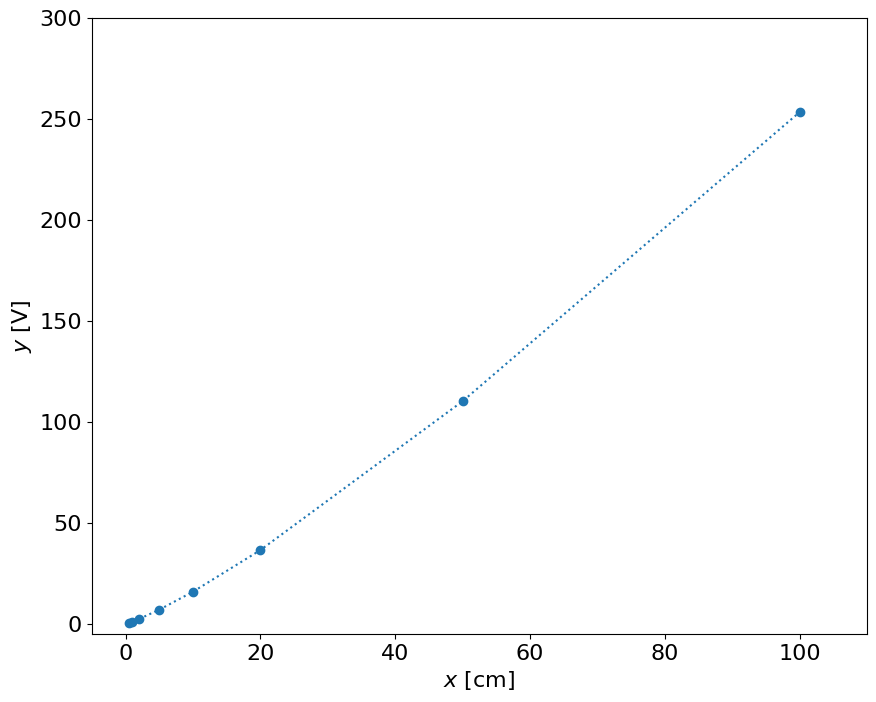

In [2]:
fig = figure()
plot(x,y,'o:')
xlim(-5,110)
ylim(-5,300)
xlabel('$x$ [cm]')
ylabel('$y$ [V]')

## Conclusion:
1. Obviously the result is non-linear and the best sensitivity we can get is between 20 and 40 cm, but not for small distances
2. If the relationship is a known function and it's a physically relevant one, we could use it to show that distance to voltage 
should be related as a power law and not really linearly. Let's check the logarithmic scale, since we know that:

$\log y = \log (bx^m) = \log b  +  m \log x $

Text(0, 0.5, '$y$ [V]')

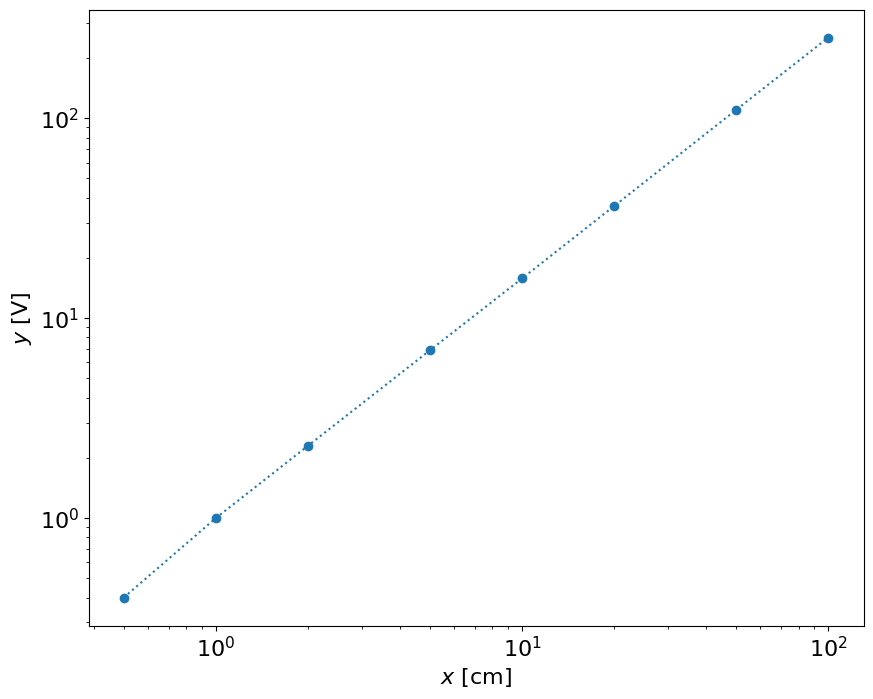

In [3]:
fig = figure()
loglog(x,y,'o:')
# xlim(-5,110)
# ylim(-5,300)
xlabel('$x$ [cm]')
ylabel('$y$ [V]')

This result shows that the result is close to linear in the log-log space. Let's do calibration in $\log(x)$ and $\log(y)$. It can be either $\log$ or $\log_{10}$


Text(0, 0.5, '$\\log (y) $ [V]')

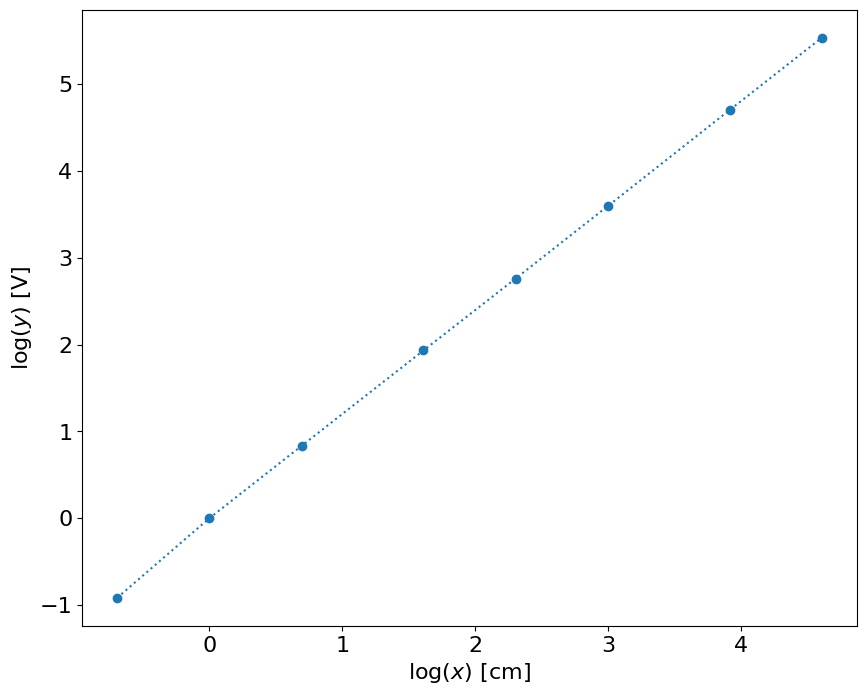

In [4]:
fig = figure()
plot(log(x),log(y),'o:')
# xlim(-5,110)
# ylim(-5,300)
xlabel('$\log (x)$ [cm]')
ylabel('$\log (y) $ [V]')

In [5]:
# linear fit
p = polyfit(log10(x),log10(y),1)
p

array([ 1.21031575, -0.01252781])

Text(0, 0.5, '$y$ [V]')

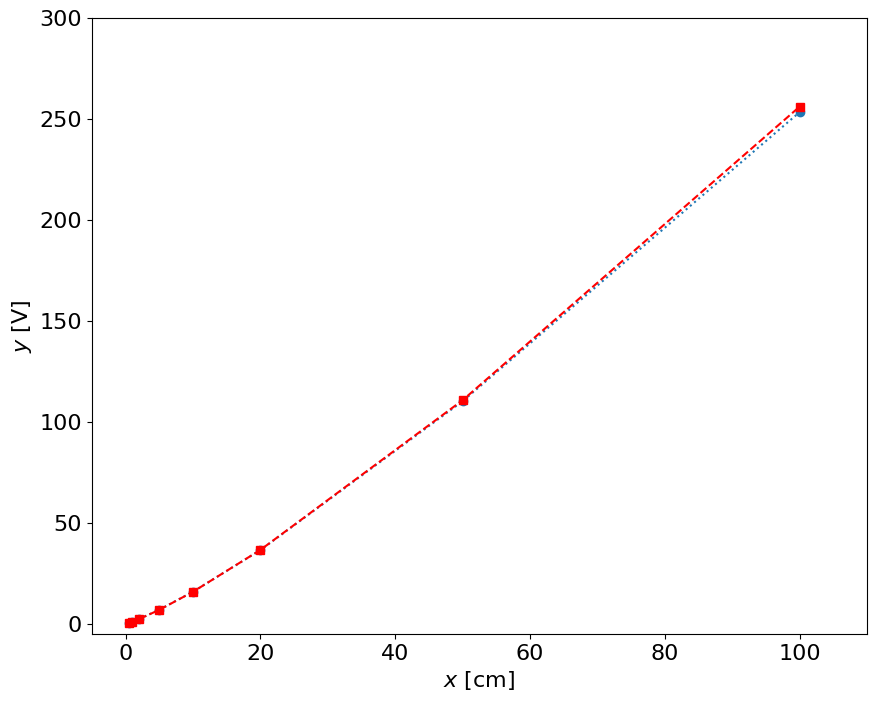

In [6]:
# let's check the fit:
fig = figure()
yfit = 10**(p[0]*log10(x) + p[1])
plot(x,y,'o:',x,yfit,'rs--')
xlim(-5,110)
ylim(-5,300)
xlabel('$x$ [cm]')
ylabel('$y$ [V]')

## how do we measure? 
1. measure the $y$ [V], take a $\log_{10}(y)$, estimate the $\log_{10}(x) $ using the calibration curve:  

$ \log_{10}(x) = (\log_{10}(y) + 0.0125)/1.21 $ 

2. Note that we can use this function in the full input scale and full output scale, take:   

$10^{\log_{10} (x)}$

3. The sensitivity of this function is: 

$K(x) = dy/dx = d/dx ( x^{1.2} ) = 1.2 x^{0.2} $

Text(0, 0.5, 'Sensitivity, K(x) ')

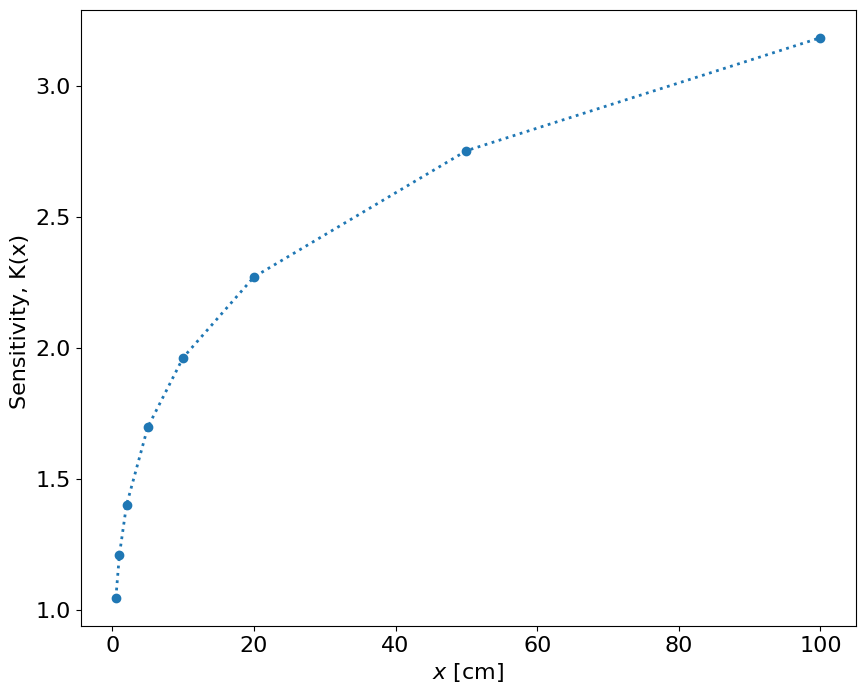

In [7]:
fig = figure()
K = 1.21*x**0.21
plot(x,K,'o:',lw=2)
xlabel('$x$ [cm]')
ylabel('Sensitivity, K(x) ')